### Loading the required libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#   

### Loading the data

In [ ]:
df_train = pd.read_csv("Data/train.csv")

In [ ]:
df_test = pd.read_csv("Data/test.csv")

#   

### Quick Data Check

#### Training set

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Statistical summary of the dataset's numerical features
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking for missing values per features
missing_values = df_train.isna().sum()
missing_percentage = (missing_values / len(df_train)) * 100

print("---- Missing Values per feature ----")
print(missing_values)

print("\n")

print("---- Mising Percentage per features ----")
print(missing_percentage)

# the 'Cabin' feature has the highest percentage of missing values

---- Missing Values per feature ----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


---- Mising Percentage per features ----
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [8]:
# Checking for data imbalance
df_train['Survived'].value_counts()

#  the training dataset is slightly imbalance

,count
Survived,
0,549
1,342


#### Test set

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
df_test.isna().sum()

# The 'Cabin' feature has the highest percentage missing values in the test dataset

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


#   

### Exploratory Data Analysis

Text(0.5, 1.0, 'Survival Rate By Gender')

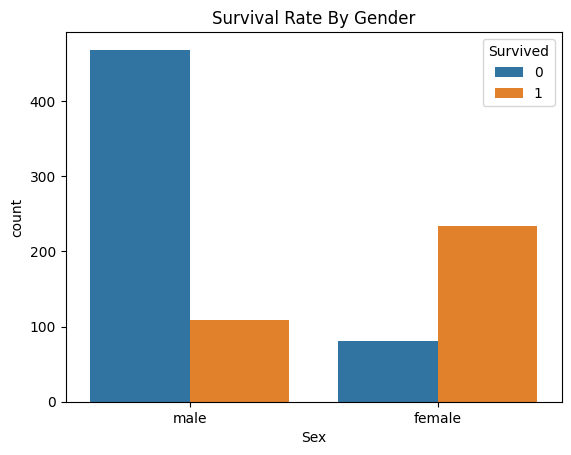

In [11]:
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title("Survival Rate By Gender")

# Females have higher survival rate compared to the males
# with higher number of females surviving

Text(0.5, 1.0, 'Survival Rate By Pclass')

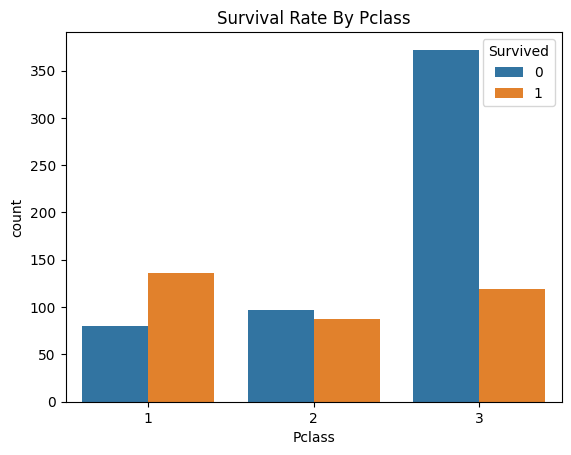

In [12]:
sns.countplot(x='Pclass', hue='Survived',data=df_train)
plt.title("Survival Rate By Pclass")

# Pclass 3 have the less survival rate compared to the rest
# with Pclass 1 having higher proportion of survived individuals

Text(0.5, 1.0, 'Survival Rate By Embarked')

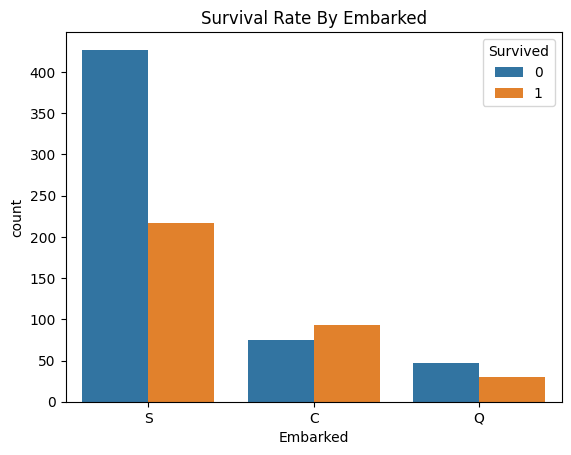

In [13]:
sns.countplot(x='Embarked', hue='Survived',data=df_train)
plt.title("Survival Rate By Embarked")

# Embarked S has the highest and the lowest survival rate

#   

### Data Preprocessing

Training set

In [14]:
# This code uses regex to create a title column by extracting prefixes (Mr, Mrs) from names

df_train['Title'] = df_train['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

In [15]:
# This code refines the 'Title' column  by converting the French titles like 'Mlle' and 'Ms' to 'Miss',
# 'Mme' to 'Mrs' and standardizing infrequent ones

df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'], 'Miss').replace('Mme','Mrs')
df_train['Title'] = df_train['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                   'Rev','Sir','Jonkheer','Dona'],'Rare')

In [16]:
# This code fills the missing values in the 'Age' column using a group=based approach (median of their Age)

df_train['Age'] = df_train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
# This code fills the missing values in the 'Embarked' features with the mode

df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [19]:
# Checking for duplicate values

df_train.duplicated().sum()

np.int64(0)

In [20]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Test set

In [21]:
# This code uses regex to create a title column by extracting prefixes (Mr, Mrs) from names

df_test['Title'] = df_test['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

In [22]:
# This code refines the 'Title' column  by converting the French titles like 'Mlle' and 'Ms' to 'Miss',
# 'Mme' to 'Mrs' and standardizing infrequent ones

df_test['Title'] = df_test['Title'].replace(['Mlle','Ms'], 'Miss').replace('Mme','Mrs')
df_test['Title'] = df_test['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                   'Rev','Sir','Jonkheer','Dona'],'Rare')

In [23]:
# This code fills the missing values in the 'Age' column using a group-based approach (the median of thier Age group)

df_test['Age'] = df_test.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [24]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

#   

#### Feature Engineering

In [25]:
# Feature selection on the training set

df_train = df_train.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Title'], axis=1)

In [26]:
# Feature selection on the test set

df_test = df_test.drop(['Name', 'Ticket', 'Cabin', 'Title',], axis=1)

In [27]:
df_test.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [28]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [29]:
df_train.columns[1:] == df_test.columns[1:]

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [30]:
print(df_train.columns)
print(df_test.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [31]:
X = df_train.drop('Survived', axis=1)

In [32]:
y = df_train['Survived']

#   

### Splitting the dataset



In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#  

### Futher Preprocessing

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
X_test_scaled = scaler.transform(X_test)

####

### Modelling and Evakuation

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score, accuracy_score

In [40]:
def evaluate_model(model):
  model.fit(X_train_scaled, y_train)
  model_preds = model.predict(X_test_scaled)

  print(f"F1 Score: {f1_score(y_test, model_preds, average="weighted")}")
  print(f"Accuracy Score: {accuracy_score(y_test, model_preds)}")
  print("\n")

  print(classification_report(y_test, model_preds))
  print("\n")
  ConfusionMatrixDisplay.from_predictions(y_test, model_preds)



using logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")

F1 Score: 0.8145376551902941
Accuracy Score: 0.8134328358208955


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        78
           1       0.75      0.84      0.79        56

    accuracy                           0.81       134
   macro avg       0.81      0.82      0.81       134
weighted avg       0.82      0.81      0.81       134





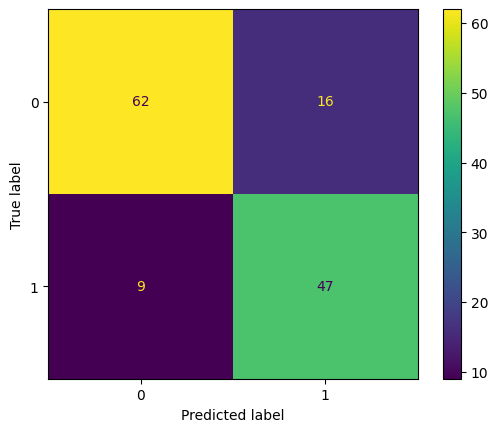

In [43]:
evaluate_model(log_model)

using random forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced" )

F1 Score: 0.8434714807350628
Accuracy Score: 0.8432835820895522


              precision    recall  f1-score   support

           0       0.87      0.86      0.86        78
           1       0.81      0.82      0.81        56

    accuracy                           0.84       134
   macro avg       0.84      0.84      0.84       134
weighted avg       0.84      0.84      0.84       134





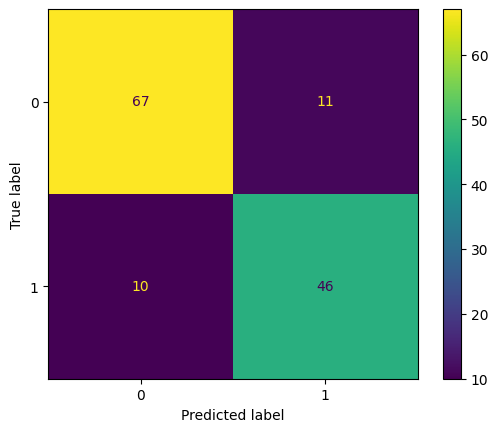

In [46]:
evaluate_model(rfc)

using Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbc = GradientBoostingClassifier(random_state=42)

F1 Score: 0.8353674664651427
Accuracy Score: 0.835820895522388


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        78
           1       0.81      0.79      0.80        56

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134





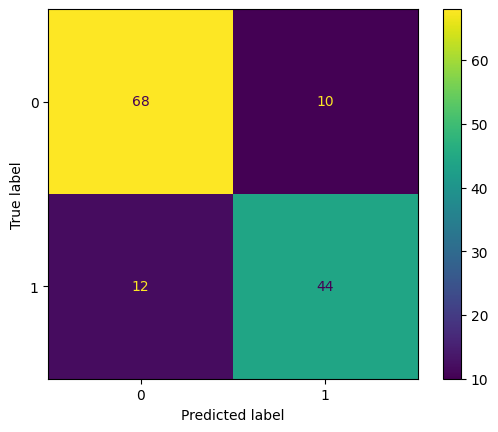

In [49]:
evaluate_model(gbc)

using Adaptive Boosting

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
adc = AdaBoostClassifier(random_state=42)

F1 Score: 0.8112199737508775
Accuracy Score: 0.8134328358208955


              precision    recall  f1-score   support

           0       0.81      0.88      0.85        78
           1       0.82      0.71      0.76        56

    accuracy                           0.81       134
   macro avg       0.81      0.80      0.80       134
weighted avg       0.81      0.81      0.81       134





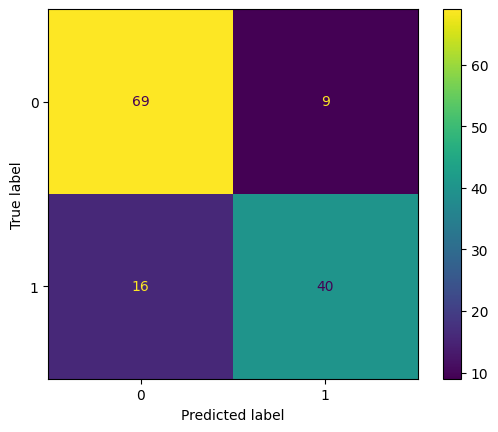

In [52]:
evaluate_model(adc)

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced" ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Adaptive Boosting": AdaBoostClassifier(random_state=42)
}

# Compare models with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print(f"{name}: {scores}")
    print(f"{name}: {scores.mean():.4f}")
    print("\n")

Logistic Regression: [0.77094972 0.7752809  0.78651685 0.75842697 0.78651685]
Logistic Regression: 0.7755


Random Forest: [0.76536313 0.79775281 0.84269663 0.76966292 0.83146067]
Random Forest: 0.8014


Gradient Boosting: [0.81564246 0.8258427  0.83707865 0.80898876 0.85393258]
Gradient Boosting: 0.8283


Adaptive Boosting: [0.79888268 0.82022472 0.80337079 0.76966292 0.82022472]
Adaptive Boosting: 0.8025




gradient boosting performed better than the rest

### Final Training

In [70]:
final_model = GradientBoostingClassifier(random_state=42)

In [71]:
final_scaler = StandardScaler()

In [72]:
X_scaled = final_scaler.fit_transform(X)

In [73]:
final_model.fit(X_scaled, y)

LogisticRegression(class_weight='balanced', max_iter=1000)

#   

In [74]:
new_X_test = df_test.drop(['PassengerId'], axis=1)
new_X_test_scaled = final_scaler.transform(new_X_test)
passenger_ids = df_test['PassengerId']

preds = final_model.predict(new_X_test_scaled)

# Submission
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': preds
})
submission.to_csv('submission.csv', index=False)

#

### Saving the submission file

In [75]:
from google.colab import files

In [76]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>